# Homework 2


   ## Problem 1 - Inverse Transform

First I will define the $ f_X(x) $  and the c.d.f. of it and the inverse cdf of it. 
$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

$$
F_X(x) = \begin{cases}
\int_1^x \frac{1}{12}(x-1)dx, &1\leq x\leq 3\\
\int_1^3 \frac{1}{12}(x-1)dx + \int_3^x -\frac{1}{12}(x-5) dx, &3< x\leq 5\\
\int_1^3 \frac{1}{12}(x-1)dx + \int_3^5 -\frac{1}{12}(x-5) dx + \int_5^x \frac{1}{6}(x-5) dx , &5< x\leq 7\\
\int_1^3 \frac{1}{12}(x-1)dx + \int_3^5 -\frac{1}{12}(x-5) dx + \int_5^7 \frac{1}{6}(x-5) dx + \int_7^x -\frac{1}{6}(x-9) dx, &7< x\leq 9\\
\end{cases}
$$

Simplifying it, we obtain $F_X(x) $
$$
F_X(x) = \begin{cases}
\left (\frac{(x-1)^{2}}{24} )\right|_1^x, &1\leq x\leq 3\\
\frac{1}{6} + \left (\frac{-(x-5)^{2}}{24})\right|_3^x, &3< x\leq 5\\
\frac{1}{3} + \left (\frac{(x-5)^{2}}{12})\right|_5^x , &5< x\leq 7\\
\frac{2}{3} + \left (\frac{(x-9)^{2}}{-12})\right|_7^x, &7< x\leq 9\\
\end{cases}
$$

Further simplifying it:

$$
F_X(x) = \begin{cases}
\frac{(x-1)^{2}}{24}, &1\leq x\leq 3\\
\frac{1}{3} - \frac{-(x-5)^{2}}{24} , &3< x\leq 5\\
\frac{1}{3} + \frac{(x-5)^{2}}{12}, &5< x\leq 7\\
1 - \frac{(x-9)^{2}}{12}, &7< x\leq 9\\
\end{cases}
$$

To invert the cdf, let's say $ F_X(x) = a $
$$
InvF_X(x) = \begin{cases}
\pm \sqrt(24a) +1 , &  1\leq x\leq 3, & 0 \le F_X(x) \le \frac{1}{6}\\
\pm \sqrt(24(\frac{1}{3} - a)) +5 , & 3\leq x\leq 5, &\frac{1}{6} \le F_X(x) \le \frac{1}{3}\\
\pm \sqrt(12(a - \frac{1}{3})) +5 , & 5\leq x\leq 7, &\frac{1}{3} \le F_X(x) \le \frac{2}{3}\\
\pm \sqrt(12(1-a) +9 , & 7\leq x\leq 9, &\frac{2}{3} \le F_X(x) \le 1\\
\end{cases}
$$


Now running the simulation to draw 10000 samples from the inversion method for 1000 times to estimate $ E[h(X)]$ :

Mean basic MC estimate using rejection sampling:  0.0588582027487
Standard deviation of our estimates:  0.000326679459236
Variance of our estimates:  1.06719469087e-07


<IPython.core.display.Javascript object>


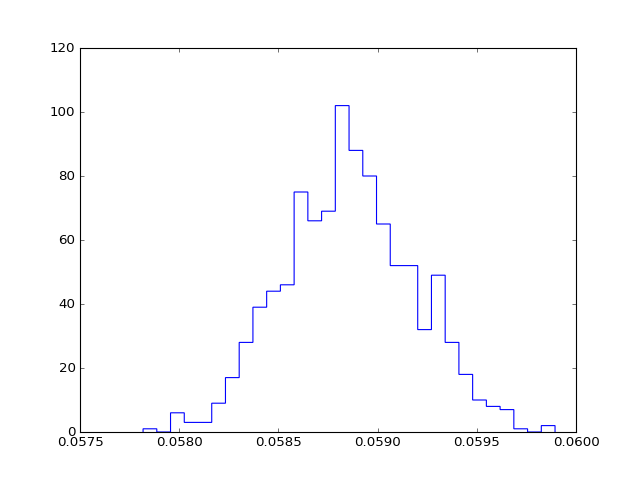

In [41]:
%matplotlib notebook
from math import sqrt
import matplotlib.pyplot as plt 
import numpy as np

h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

def f(x):
    x = float(x)
    if x < 3 and x >=1:
        result = (x-1)/12
    elif x < 5 and x >=3:
        result =  -(x-5)/12
    elif x < 7 and x >=5:
        result = (x-5)/6
    elif x <=9 and x >= 7:
        result = -(x-9)/6
    return result

def fx_cdf(x):
    ans = np.zeros(1)
    if x < 3 and x >=1:
        ans[0] = (((x-1)**2/24)-((1-1)**2/24))
    elif x < 5 and x >=3:
        ans[0] =  1/6 + ((-(x-5)**2/24)-(-(3-5)**2/24))
    elif x < 7 and x >=5:
        ans[0] = 1/3 + (((x-5)**2/12)-(-(5-5)**2/12))
    elif x <=9 and x >= 7:
        ans[0] = 2/3 + ((-(x-9)**2/12)-(-(7-9)**2/12))
    return ans[0]

def invfx_cdf(a):
    root = np.zeros(2)
    if a < 1/6 and a >=0:
        root[0] = sqrt(24*a)+1
        root[1]  = -sqrt(24*a)+1
        root = [elem for elem in root if elem >= 1 and elem <=3]
        
    elif a < 1/3 and a >=1/6:
        root[0] = sqrt(24*(1/3-a))+5
        root[1] =-sqrt(24*(1/3-a))+5
        root = [elem for elem in root if elem >= 3 and elem <=5]
        
    elif a < 2/3 and a >=1/3:
        root[0]  = sqrt(12*(a - 1/3))+5
        root[1]  = -sqrt(12*(a - 1/3))+5
        root = [elem for elem in root if elem >= 5 and elem <=7]

    elif a >= 2/3:
        root[0]  = sqrt(12*(1-a))+9
        root[1]  = -sqrt(12*(1-a))+9   
        root = [elem for elem in root if elem >= 7 and elem <=9] 
    return root[0]    


## =============================================================
## MONTE CARLO INTEGRATION WITH SAMPLING FROM INVERSION SAMPLING
## =============================================================

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

MC_Inv = np.zeros(1000)

for k in np.arange(0,1000):
    N = 1000 # the total of samples we wish to generate
    R = np.random.uniform(0, 1, N)
    Rvals = [invfx_cdf(run) for run in R]
    x_mc = Rvals
    result = [h(dig) for dig in x_mc]
    MC_Inv[k] = np.mean(result)

print("Mean basic MC estimate using rejection sampling: ", np.mean(MC_Inv))
print("Standard deviation of our estimates: ", np.std(MC_Inv))
print("Variance of our estimates: ", (np.std(MC_Inv))**2)

plt.figure()
plt.hist(MC_Inv,30, histtype='step', label=u'MC(Inversion)');
plt.show()


## Problem 1 - Rejection Sampling with Uniform Distribution

Now Running
Mean basic MC estimate using rejection sampling:  0.0588544345085
Standard deviation of our estimates:  0.000314753788803
Variance of our estimates:  9.90699475661e-08


<IPython.core.display.Javascript object>


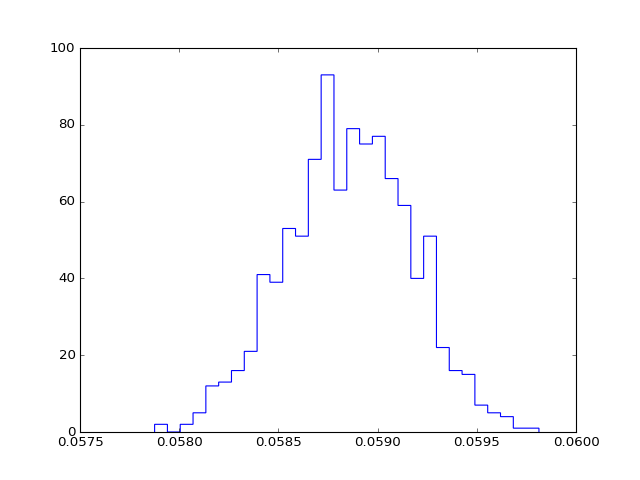

In [42]:
#=====================================================#
#Running Rejection Sampling Using Uniform Distribution
#evaluate E[h(x)]  #
#=====================================================#
print('Now Running')
ymax = 1/3   #max of f(x) in p.d.f.

MC_RejU = np.zeros(1000)
for k in np.arange(0,1000):
    #print(k)
    N = 1000 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):
        
        # pick a uniform number on [xmin, xmax) (e.g. 0...10)
        x = np.random.uniform(xmin, xmax)
        
        # pick a uniform number on [0, ymax)
        y = np.random.uniform(0,ymax)
        
        # Do the accept/reject comparison
        if y < f(x):
            samples[accepted] = x
            accepted += 1
        
        count +=1

    x_mc = samples
    result = [h(dig) for dig in x_mc]
    MC_RejU[k] = np.mean(result)

print("Mean basic MC estimate using rejection sampling: ", np.mean(MC_RejU))
print("Standard deviation of our estimates: ", np.std(MC_RejU))
print("Variance of our estimates: ", (np.std(MC_RejU))**2)

plt.figure()
plt.hist(MC_RejU,30, histtype='step', label=u'MC(Rej Unif)');



## Problem 1 - Rejection Sampling Using Proposed Normal Distribution

Let me display my proposal $Mg(x) $, $M = 3.3$, $g(x) \sim N~(5,3) $

<IPython.core.display.Javascript object>


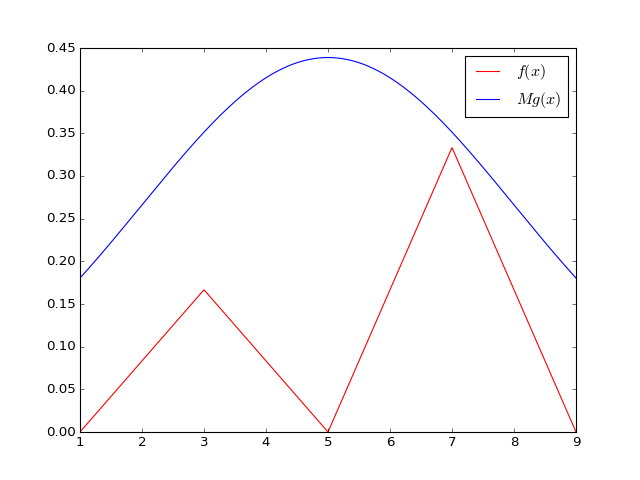

In [38]:
%matplotlib notebook
from math import sqrt
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm
#setting parameter M as 3.3
mu = 5;
sig =3;
M = 3.3

def f(x):
    x = float(x)
    if x < 3 and x >=1:
        result = (x-1)/12
    elif x < 5 and x >=3:
        result =  -(x-5)/12
    elif x < 7 and x >=5:
        result = (x-5)/6
    elif x <=9 and x >= 7:
        result = -(x-9)/6
    return result

#gx
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
fvals = [f(i) for i in xvals]
gvals = [M*p(i) for i in xvals]
plt.plot(xvals, fvals, 'r', label=u'$f(x)$')
plt.plot(xvals, gvals, 'b', label=u'$Mg(x)$')
plt.legend()
plt.show()


running
Mean basic MC estimate using rejection sampling:  0.0588639571768
Standard deviation of our estimates:  0.000327260498893
Variance of our estimates:  1.07099434136e-07


<IPython.core.display.Javascript object>


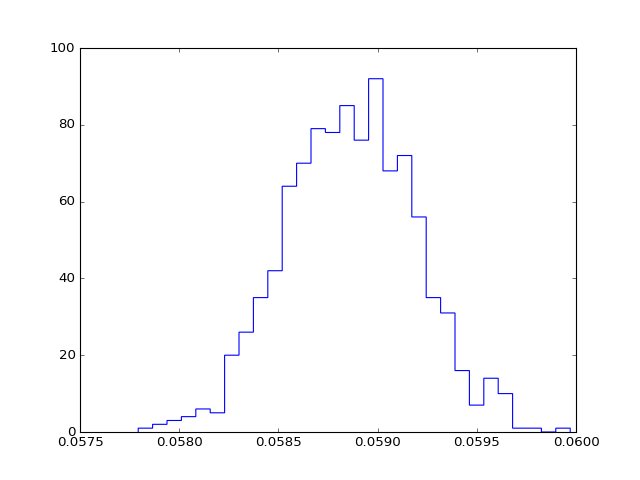

In [43]:
%matplotlib notebook
#=====================================================#
#Running Rejection Sampling Using Normal Distribution
#evaluate E[h(x)]  #
#=====================================================#
print('running')

#hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

#setting parameter M as 3.3
mu = 5;
sig =3;
M = 3.3
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

### range limits for inverse sampling
umin = normfun(xmin)
umax = normfun(xmax)

MC_RejS = np.zeros(1000)

for k in np.arange(0,1000):
    N = 1000 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):
        
        # Sample from g using inverse sampling
        u = np.random.uniform(umin, umax)
        xproposal = mu + sig*norm.ppf(u)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)
        
        
        # Do the accept/reject comparison
        if y < f(xproposal)/(M*p(xproposal)):
            samples[accepted] = xproposal
            accepted += 1    

    
        count +=1


    x_mc = samples
    result = [h(dig) for dig in x_mc]
    MC_RejS[k] = np.mean(result)

print("Mean basic MC estimate using rejection sampling: ", np.mean(MC_RejS))
print("Standard deviation of our estimates: ", np.std(MC_RejS))
print("Variance of our estimates: ", (np.std(MC_RejS)**2))


plt.figure()
plt.hist(MC_RejS,30, histtype='step', label=u'MC(Rej Norm)');


## Problem 1 - Importance Sampling with Uniform Distribution

Let me first visualize $g(x)$ and $f(x) $ 

<IPython.core.display.Javascript object>


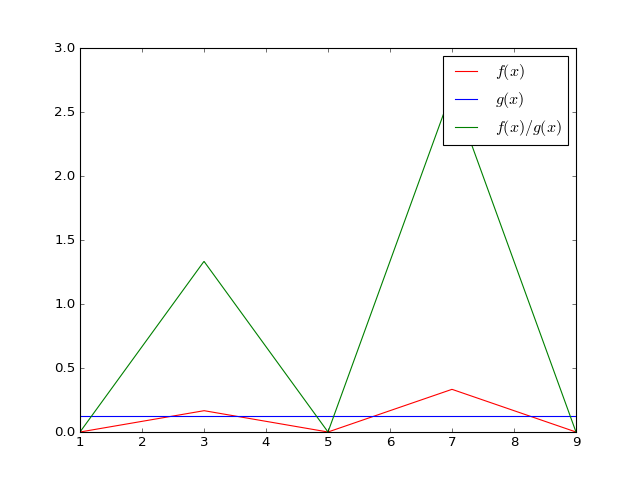

In [18]:
%matplotlib notebook
#gx U~[0,1] x=[1,9]  g(x) =  1/ (9-1)
g = 1/8

def f(x):
    x = float(x)
    if x < 3 and x >=1:
        result = (x-1)/12
    elif x < 5 and x >=3:
        result =  -(x-5)/12
    elif x < 7 and x >=5:
        result = (x-5)/6
    elif x <=9 and x >= 7:
        result = -(x-9)/6
    return result


# domain limits
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
fvals = [f(i) for i in xvals]
gvals = [g for i in xvals]
dvals = [fvals[i]/gvals[i] for i in range(len(gvals))]
plt.figure()
plt.plot(xvals, fvals, 'r', label=u'$f(x)$')
plt.plot(xvals, gvals, 'b', label=u'$g(x)$')
plt.plot(xvals, dvals, 'g', label=u'$f(x)/g(x)$')

plt.legend()
plt.show()


running
Mean basic MC estimate using important sampling:  0.0589368391841
Standard deviation of our estimates:  0.00136545878961
Variance of our estimates:  1.86447770612e-06


<IPython.core.display.Javascript object>


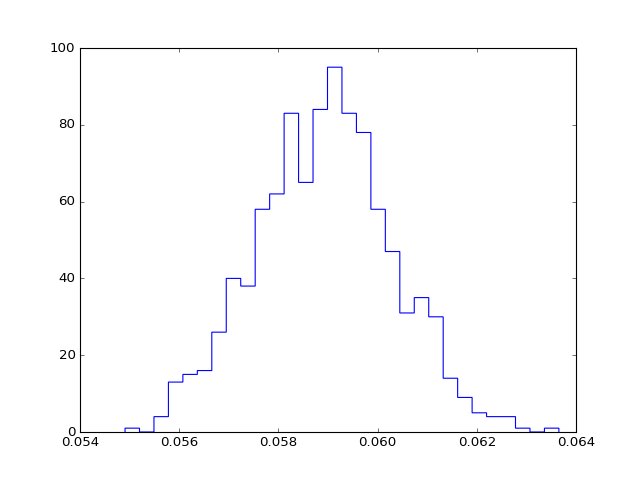

In [44]:
%matplotlib notebook
##=====================================================#
##Running Importance Sampling Using Uniform Distribution
##evaluate E[h(x)]#
##=====================================================#

print('running')
#hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

MC_ImpU = np.zeros(1000)
for k in np.arange(0,1000):
    N = 1000 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):
        
        # Sample from g using inverse sampling
        xproposal = np.random.uniform(xmin, xmax)
        samples[accepted] = xproposal
        accepted += 1    
        count +=1

    x_mc = samples
    result = [h(dig)*f(dig)/g for dig in x_mc]
    MC_ImpU[k] = np.mean(result)

print("Mean basic MC estimate using important sampling: ", np.mean(MC_ImpU))
print("Standard deviation of our estimates: ", np.std(MC_ImpU))
print("Variance of our estimates: ", (np.std(MC_ImpU)**2))

plt.figure()
plt.hist(MC_ImpU,30, histtype='step', label=u'MC(Imp Uni)');

## Problem 1 - Importance Sampling with Normal Distribution

Let me display my proposal $g(x) $,  $g(x) \sim N~(7,2.5) $

<IPython.core.display.Javascript object>


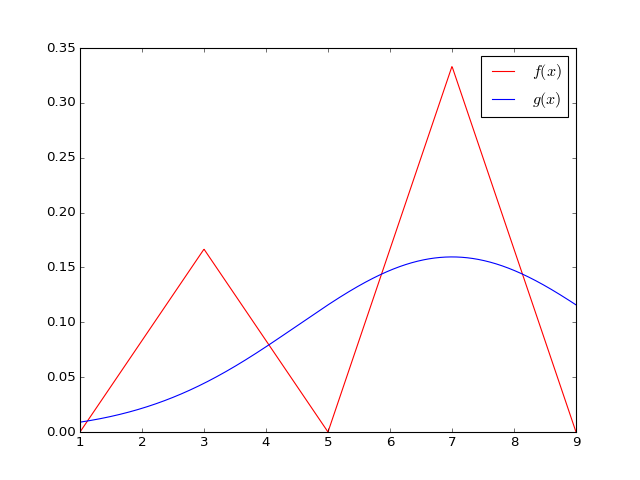

In [21]:
%matplotlib notebook
mu = 7;
sig =2.5;

#gx
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

def f(x):
    x = float(x)
    if x < 3 and x >=1:
        result = (x-1)/12
    elif x < 5 and x >=3:
        result =  -(x-5)/12
    elif x < 7 and x >=5:
        result = (x-5)/6
    elif x <=9 and x >= 7:
        result = -(x-9)/6
    return result


# domain limits
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
fvals = [f(i) for i in xvals]
gvals = [p(i) for i in xvals]
plt.plot(xvals, fvals, 'r', label=u'$f(x)$')
plt.plot(xvals, gvals, 'b', label=u'$g(x)$')
plt.legend()
plt.show()


running
Mean basic MC estimate using importance sampling:  0.0588577291914
Standard deviation of our estimates:  0.00138037131652
Standard deviation of our estimates:  1.90542497148e-06


<IPython.core.display.Javascript object>


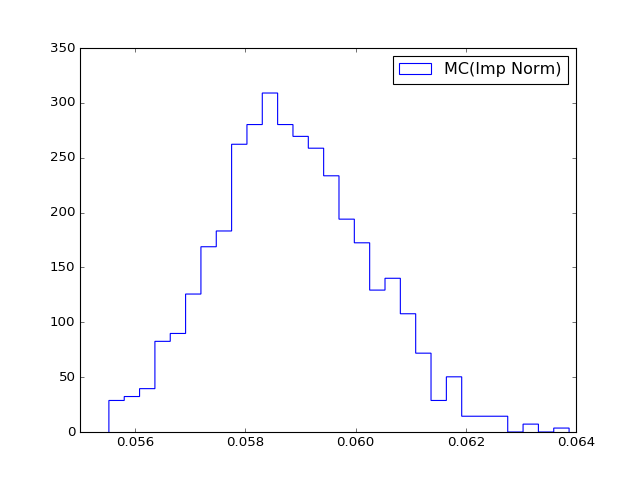

In [45]:
%matplotlib notebook
##=====================================================#
##Running Importance Sampling Using Normal Distribution
##evaluate E[h(x)]#
##=====================================================#
print('running')
##hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))
###
N = 1000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals
#
#
Iis = np.zeros(1000)
#
for k in np.arange(0,1000):
    # DRAW FROM THE GAUSSIAN mean =2 std = sqrt(0.4) 
    xis = mu + sig*np.random.randn(N,1);
    #hist(x)
    xis = xis[ (xis<xmax) & (xis>xmin)]
    fxis = [f(val) for val in xis]
#
    # normalization for gaussian from 1..9
    normal = normfun(9)-normfun(1);
    Iis[k] =np.mean(h(xis)*(fxis)/p(xis))*normal;
#
#
print("Mean basic MC estimate using importance sampling: ", np.mean(Iis))
print("Standard deviation of our estimates: ", np.std(Iis))
print("Standard deviation of our estimates: ", (np.std(Iis)**2))
    
### get the histogram info
hinfo = np.histogram(Iis,30)
plt.figure()
plt.hist(Iis,30, histtype='step', label=u'MC(Imp Norm)',normed=True);

plt.legend()


<IPython.core.display.Javascript object>


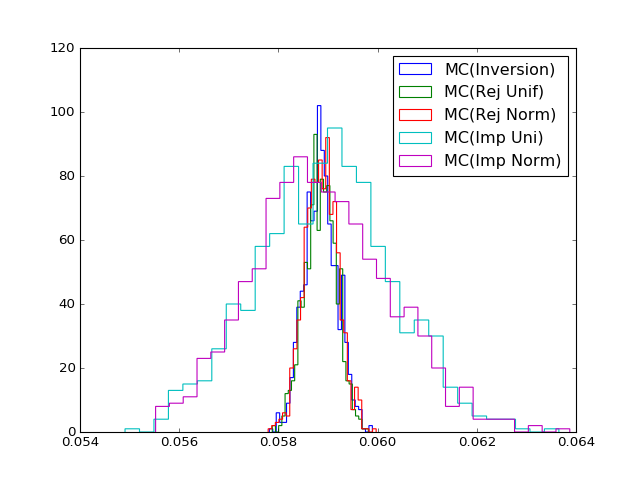

In [46]:
%matplotlib notebook
plt.figure()
plt.hist(MC_Inv,30, histtype='step', label=u'MC(Inversion)');
plt.hist(MC_RejU,30, histtype='step', label=u'MC(Rej Unif)');
plt.hist(MC_RejS,30, histtype='step', label=u'MC(Rej Norm)');
plt.hist(MC_ImpU,30, histtype='step', label=u'MC(Imp Uni)');
plt.hist(Iis,30, histtype='step', label=u'MC(Imp Norm)');

plt.legend()
plt.show()

## Problem 2 - Variance Reduction - Part A

<IPython.core.display.Javascript object>


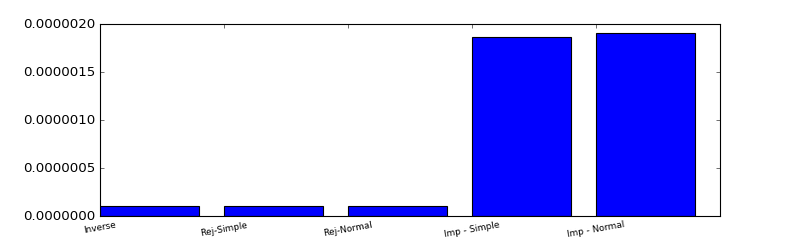

Variance of Inverse Transform =  1.06719469087e-07
Variance of Rejection Sampling using Uniform Distribution = 9.90699475661e-08
Variance of Rejection Sampling using Normal Distribution = 1.07099434136e-07
Variance of Importance Sampling using Uniform Distribution = 1.86447770612e-06
Variance of Importance Sampling using Normal Distribution = 1.90542497148e-06


[None, None, None, None, None, None, None, None, None, None]

In [57]:
%matplotlib notebook

import pylab as pl
import datetime

plt.figure(figsize=(10,3))

ax = pl.subplot(111)

print('Variance of Inverse Transform = ', np.std(MC_Inv)**2)
print('Variance of Rejection Sampling using Uniform Distribution =', np.std(MC_RejU)**2)
print('Variance of Rejection Sampling using Normal Distribution =', np.std(MC_RejS)**2)
print('Variance of Importance Sampling using Uniform Distribution =', np.std(MC_ImpU)**2)
print('Variance of Importance Sampling using Normal Distribution =', np.std(Iis)**2)

#visualize using a bar chart
N = 5
Var = [np.std(MC_Inv)**2,np.std(MC_RejU)**2,np.std(MC_RejS)**2,np.std(MC_ImpU)**2, np.std(Iis)**2]
ind = np.arange(N)
Label = ['Inverse','Rej-Simple','Rej-Normal','Imp - Simple','Imp - Normal']
width = 0.8
ax.bar(ind, Var, width=width)
xtickNames = ax.set_xticklabels(Label)
plt.setp(xtickNames, rotation=10, fontsize=8)

From our discussion in class, I would expect inverse sampling, rejection with normal dist, and importance sampling with normal distribution would have the lowest variance since they approximate the distribution of the underlying $f(x)$ the most. But my results for the importance sampling using normal distribution don't align with the expectations. I think it has to do with the fact that the normal curve doesn't fit the overall shape of the pdf that well. Whereas for Rejection Sampling Using Normal Distribution, I was able to use a multiplier M to adjust the curve to fit it better. 

## Problem 2 - Variance Reduction - Part B - Stratified Sampling

I'm partitioning the curve in 4 parts where I will use a normal curve for each part. 

$$ E[h(X)] = a_1 E[h(x_1)] + a_2 E[h(x_2)] + a_3 E[h(x_3)]+ a_4 E[h(x_4)] $$

$$ a_1 = \frac{1}{6} , a_2 = \frac{1}{6}, a_3 = \frac{1}{3}, a_4 = \frac{1}{3} $$

$$
E_h(X) = \frac{1}{6}\int_1^3 \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( x_1 - 5\right)^2\right\}dx +
\frac{1}{6}\int_3^5 \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( x_2 - 5\right)^2\right\}dx +
\frac{1}{3}\int_3^5 \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( x_3 - 5\right)^2\right\}dx +
\frac{1}{3}\int_3^5 \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( x_4 - 5\right)^2\right\}dx
$$


In [63]:
#this is to optimize the number of samples in each partition
#by calculating the weighted S.D. of h(x) when drawing samples from f(x)
%matplotlib notebook

from math import sqrt

def f(x):
    x = float(x)
    if x < 3 and x >=1:
        result = (x-1)/12
    elif x < 5 and x >=3:
        result =  -(x-5)/12
    elif x < 7 and x >=5:
        result = (x-5)/6
    elif x <=9 and x >= 7:
        result = -(x-9)/6
    return result
    
    
def fx_cdf(x):
    ans = np.zeros(1)
    if x < 3 and x >=1:
        ans[0] = (((x-1)**2/24)-((1-1)**2/24))
    elif x < 5 and x >=3:
        ans[0] =  1/6 + ((-(x-5)**2/24)-(-(3-5)**2/24))
    elif x < 7 and x >=5:
        ans[0] = 1/3 + (((x-5)**2/12)-(-(5-5)**2/12))
    elif x <=9 and x >= 7:
        ans[0] = 2/3 + ((-(x-9)**2/12)-(-(7-9)**2/12))
    return ans[0]

def invfx_cdf(a):
    root = np.zeros(2)
    if a < 1/6 and a >=0:
        root[0] = sqrt(24*a)+1
        root[1]  = -sqrt(24*a)+1
        root = [elem for elem in root if elem >= 1 and elem <=3]
        
    elif a < 1/3 and a >=1/6:
        root[0] = sqrt(24*(1/3-a))+5
        root[1] =-sqrt(24*(1/3-a))+5
        root = [elem for elem in root if elem >= 3 and elem <=5]
        
    elif a < 2/3 and a >=1/3:
        root[0]  = sqrt(12*(a - 1/3))+5
        root[1]  = -sqrt(12*(a - 1/3))+5
        root = [elem for elem in root if elem >= 5 and elem <=7]

    elif a >= 2/3:
        root[0]  = sqrt(12*(1-a))+9
        root[1]  = -sqrt(12*(1-a))+9   
        root = [elem for elem in root if elem >= 7 and elem <=9] 
    return root[0]    

N = 10000 # the total of samples we wish to generate
R = np.random.uniform(0, 1, N)
Rvals = [invfx_cdf(run) for run in R]
x_mc = Rvals

x_mc1 = [elem for elem in x_mc if elem >= 1 and elem <=3]
x_mc2 = [elem for elem in x_mc if elem >= 3 and elem <=5]
x_mc3 = [elem for elem in x_mc if elem >= 5 and elem <=7]
x_mc4 = [elem for elem in x_mc if elem >= 7 and elem <=9]

#hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

hx_mc1 = [h(dig) for dig in x_mc1]
hx_mc2 = [h(dig) for dig in x_mc2]
hx_mc3 = [h(dig) for dig in x_mc3]
hx_mc4 = [h(dig) for dig in x_mc4]

sd_x = [np.std(hx_mc1),np.std(hx_mc2),np.std(hx_mc3),np.std(hx_mc4)]
p_x = [1/6,1/6,1/3,1/3]

total = [sd_x[i]*p_x[i] for i in range(len(sd_x))]
total_sum = sum(total)

print(total_sum)

N_all = [total[i]/total_sum*1000 for i in range(len(total))]

print(N_all)

#Rounding it up 

N1 = 203
N2 = 126
N3 = 254
N4 = 417


0.00565504059159
[202.83711859300433, 126.61767175782865, 254.40152018288171, 416.14368946628525]


<IPython.core.display.Javascript object>


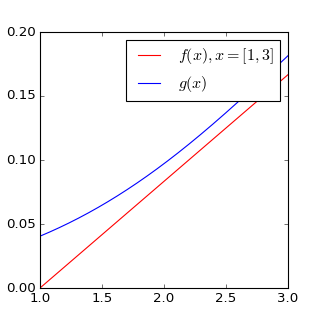

<IPython.core.display.Javascript object>


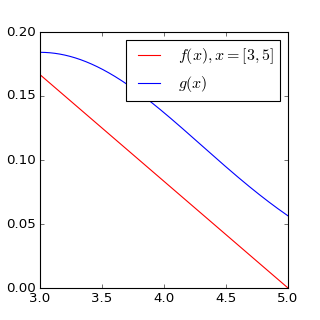

<IPython.core.display.Javascript object>


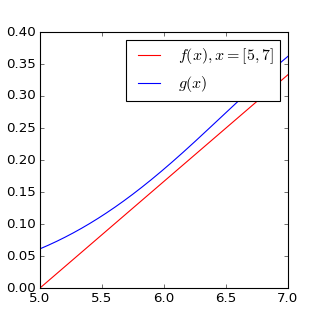

<IPython.core.display.Javascript object>


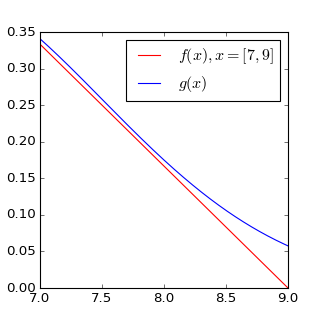

In [67]:
####################
#E[T] = a1 E[T1] + a2 E[T2] + a3 E[T3] + a4 E[T4]
####################

a1 = 1/6
a2 = 1/6
a3 = 1/3
a4 = 1/3

fx1 = lambda x: (x-1)/12
fx2 = lambda x: -(x-5)/12
fx3 = lambda x:(x-5)/6
fx4 = lambda x:-(x-9)/6

#setting parameter M as 1.5 for E[T1]
mu = 5;
sig =2;
M = 1.5

#gx
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

def f(x):
    x = float(x)
    if x < 3 and x >=1:
        result = (x-1)/12
    elif x < 5 and x >=3:
        result =  -(x-5)/12
    elif x < 7 and x >=5:
        result = (x-5)/6
    elif x <=9 and x >= 7:
        result = -(x-9)/6
    return result

###################
# ESTIMATE E[T1]  #
###################

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 3 # the upper limit of our domain

# plot our (normalized) function

xvals=np.linspace(xmin, xmax, 1000)
fvals = [fx1(i) for i in xvals]
gvals = [M*p(i) for i in xvals]
plt.figure(figsize=(4,4))
plt.plot(xvals, fvals, 'r', label=u'$f(x),x=[1,3]$')
plt.plot(xvals, gvals, 'b', label=u'$g(x)$')
plt.legend()
plt.show()

###################
# ESTIMATE E[T2]  #
###################


# domain limits
xmin = 3 # the lower limit of our domain
xmax = 5 # the upper limit of our domain

#setting parameter M as 1.5 for E[T1]
mu = 3;
sig =1.3;
M = 0.6

xvals=np.linspace(xmin, xmax, 1000)
fvals = [fx2(i) for i in xvals]
gvals = [M*p(i) for i in xvals]
plt.figure(figsize=(4,4))
plt.plot(xvals, fvals, 'r', label=u'$f(x),x=[3,5]$')
plt.plot(xvals, gvals, 'b', label=u'$g(x)$')
plt.legend()
plt.show()


###################
# ESTIMATE E[T3]  #
###################

# domain limits
xmin = 5 # the lower limit of our domain
xmax = 7 # the upper limit of our domain

#setting parameter M as 1.5 for E[T1]
mu = 8;
sig = 1.5;
M = 1.7

xvals=np.linspace(xmin, xmax, 1000)
fvals = [fx3(i) for i in xvals]
gvals = [M*p(i) for i in xvals]
plt.figure(figsize=(4,4))
plt.plot(xvals, fvals, 'r', label=u'$f(x),x=[5,7]$')
plt.plot(xvals, gvals, 'b', label=u'$g(x)$')
plt.legend()
plt.show()


###################
# ESTIMATE E[T4]  #
###################

# domain limits
xmin = 7 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

#setting parameter M as 1.5 for E[T1]
mu = 6;
sig = 1.5;
M = 1.6

xvals=np.linspace(xmin, xmax, 1000)
fvals = [fx4(i) for i in xvals]
gvals = [M*p(i) for i in xvals]
plt.figure(figsize=(4,4))
plt.plot(xvals, fvals, 'r', label=u'$f(x),x=[7,9]$')
plt.plot(xvals, gvals, 'b', label=u'$g(x)$')
plt.legend()
plt.show()



Mean basic MC estimate using rejection sampling:  0.0504373973008
Standard deviation of our estimates:  0.00049480235339
Variance of our estimates:  2.4482936892e-07


<IPython.core.display.Javascript object>


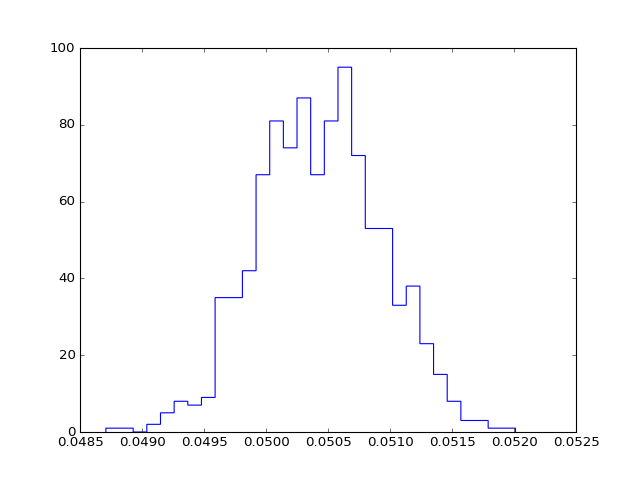

In [68]:
#=====================================================#
#Running Rejection Sampling Using Normal Distribution
#evaluate E[T1]  #
#=====================================================#

#hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

#setting parameter M as 1.5 for E[T1]
mu = 5;
sig =2;
M = 1.5

xmin= 1
xmax = 3

#gx
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

umin = normfun(xmin)
umax = normfun(xmax)


MC_Rej_T1 = np.zeros(1000)
for k in np.arange(0,1000):
    N = 203 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):
        
        # Sample from g using inverse sampling
        u = np.random.uniform(umin, umax)
        xproposal = mu + sig*norm.ppf(u)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)
        
        
        # Do the accept/reject comparison
        if y < f(xproposal)/(M*p(xproposal)):
            samples[accepted] = xproposal
            accepted += 1    

    
        count +=1


    x_mc = samples
    result = [h(dig) for dig in x_mc]
    MC_Rej_T1[k] = np.mean(result)

print("Mean basic MC estimate using rejection sampling: ", np.mean(MC_Rej_T1))
print("Standard deviation of our estimates: ", np.std(MC_Rej_T1))
print("Variance of our estimates: ", (np.std(MC_Rej_T1)**2))


plt.figure()
plt.hist(MC_Rej_T1,30, histtype='step', label=u'$E[T_1]$');


Mean basic MC estimate using rejection sampling:  0.0672818853057
Standard deviation of our estimates:  0.000391796041582
Variance of our estimates:  1.535041382e-07


<IPython.core.display.Javascript object>


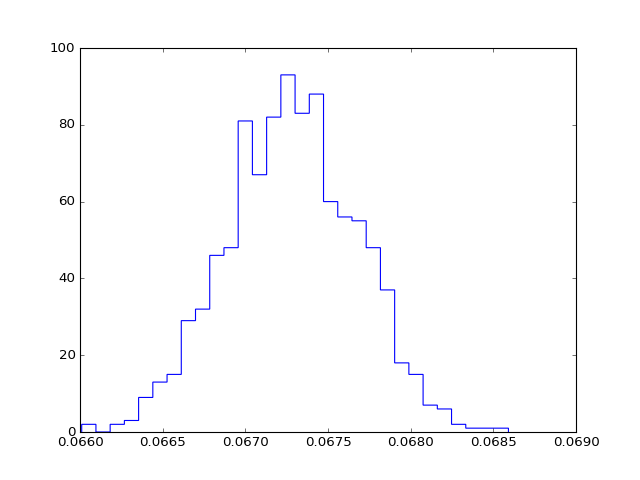

In [69]:
#=====================================================#
#Running Rejection Sampling Using Normal Distribution
#evaluate E[T2]  #
#=====================================================#

#hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

#setting parameter M as 0.6 for E[T2]
mu = 3;
sig =1.3;
M = 0.6

xmin= 3
xmax = 5

#gx
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

umin = normfun(xmin)
umax = normfun(xmax)


MC_Rej_T2 = np.zeros(1000)
for k in np.arange(0,1000):
    N = 126 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):
        
        # Sample from g using inverse sampling
        u = np.random.uniform(umin, umax)
        xproposal = mu + sig*norm.ppf(u)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)
        
        
        # Do the accept/reject comparison
        if y < f(xproposal)/(M*p(xproposal)):
            samples[accepted] = xproposal
            accepted += 1    

    
        count +=1


    x_mc = samples
    result = [h(dig) for dig in x_mc]
    MC_Rej_T2[k] = np.mean(result)

print("Mean basic MC estimate using rejection sampling: ", np.mean(MC_Rej_T2))
print("Standard deviation of our estimates: ", np.std(MC_Rej_T2))
print("Variance of our estimates: ", (np.std(MC_Rej_T2)**2))


plt.figure()
plt.hist(MC_Rej_T2,30, histtype='step', label=u'$E[T_2]$');

#################################################################

Mean basic MC estimate using rejection sampling:  0.0672731907061
Standard deviation of our estimates:  0.000283976733227
Variance of our estimates:  8.06427850142e-08


<IPython.core.display.Javascript object>


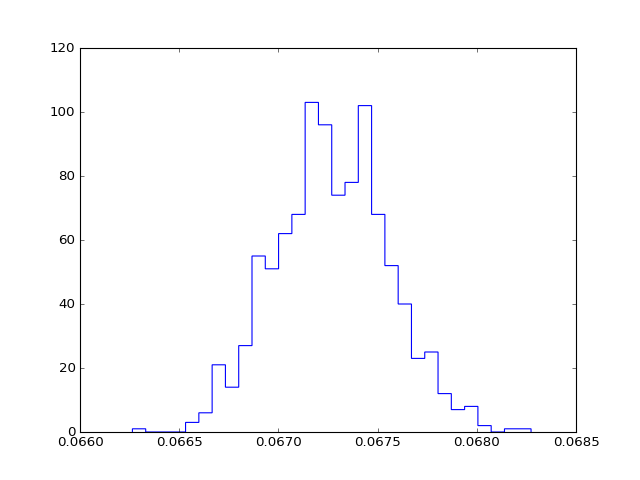

In [70]:
#=====================================================#
#Running Rejection Sampling Using Normal Distribution
#evaluate E[T3]  #
#=====================================================#

#hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

#setting parameter M as 1.7 for E[T3]
mu = 8;
sig =1.5;
M = 1.7

xmin= 5
xmax = 7

#gx
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

umin = normfun(xmin)
umax = normfun(xmax)


MC_Rej_T3 = np.zeros(1000)
for k in np.arange(0,1000):
    N = 254 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):
        
        # Sample from g using inverse sampling
        u = np.random.uniform(umin, umax)
        xproposal = mu + sig*norm.ppf(u)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)
        
        
        # Do the accept/reject comparison
        if y < f(xproposal)/(M*p(xproposal)):
            samples[accepted] = xproposal
            accepted += 1    

    
        count +=1


    x_mc = samples
    result = [h(dig) for dig in x_mc]
    MC_Rej_T3[k] = np.mean(result)

print("Mean basic MC estimate using rejection sampling: ", np.mean(MC_Rej_T3))
print("Standard deviation of our estimates: ", np.std(MC_Rej_T3))
print("Variance of our estimates: ", (np.std(MC_Rej_T3)**2))


plt.figure()
plt.hist(MC_Rej_T3,30, histtype='step', label=u'$E[T_3]$');

#################################################################


Mean basic MC estimate using rejection sampling:  0.0504352972589
Standard deviation of our estimates:  0.000346717289954
Variance of our estimates:  1.20212879153e-07


<IPython.core.display.Javascript object>


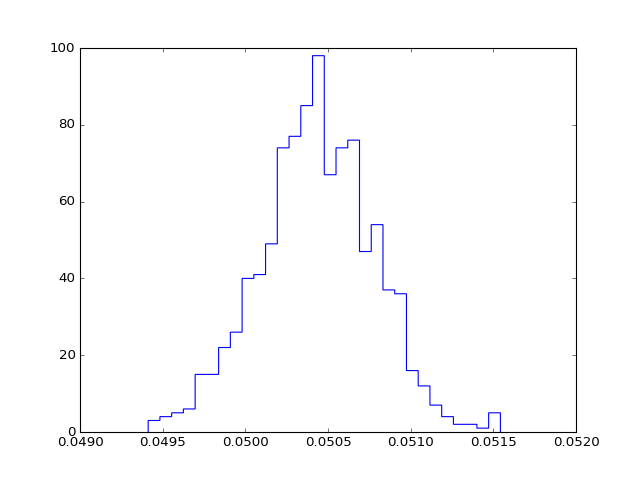

In [71]:
#=====================================================#
#Running Rejection Sampling Using Normal Distribution
#evaluate E[T4]  #
#=====================================================#

#hx
h = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

#setting parameter M as 1.6 for E[T4]
mu = 6;
sig =1.5;
M = 1.6

xmin= 7
xmax = 9

#gx
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

umin = normfun(xmin)
umax = normfun(xmax)


MC_Rej_T4 = np.zeros(1000)
for k in np.arange(0,1000):
    N = 417 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):
        
        # Sample from g using inverse sampling
        u = np.random.uniform(umin, umax)
        xproposal = mu + sig*norm.ppf(u)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)
        
        
        # Do the accept/reject comparison
        if y < f(xproposal)/(M*p(xproposal)):
            samples[accepted] = xproposal
            accepted += 1    

    
        count +=1


    x_mc = samples
    result = [h(dig) for dig in x_mc]
    MC_Rej_T4[k] = np.mean(result)

print("Mean basic MC estimate using rejection sampling: ", np.mean(MC_Rej_T4))
print("Standard deviation of our estimates: ", np.std(MC_Rej_T4))
print("Variance of our estimates: ", (np.std(MC_Rej_T4)**2))


plt.figure()
plt.hist(MC_Rej_T4,30, histtype='step', label=u'$E[T_4]$');


Calculating $E[h(X)]$ and $ Var(E[h(X)]$:

In [72]:
a = [a1,a2,a3,a4]
b = [a[i]**2 for i in range(len(a))]
mean_T = [np.mean(MC_Rej_T1),np.mean(MC_Rej_T2),np.mean(MC_Rej_T3),np.mean(MC_Rej_T4)]
E_T = [mean_T[i]*a[i] for i in range(len(a))]
SD_T = [np.std(MC_Rej_T1),np.std(MC_Rej_T2),np.std(MC_Rej_T3),np.std(MC_Rej_T4)]
var_T = [SD_T[i]**2 for  i in range(len(SD_T))]
Var_TX = [b[i]*var_T[i] for i in range(len(var_T))]
print('Sum of E[h(X)] using stratified smapling is ', sum(E_T))
print('Variance of E[H(X)] using stratified sampling is', sum(Var_TX))

Sum of E[h(X)] using stratified smapling is  0.0588560430894
Variance of E[H(X)] using stratified sampling is 3.33821156608e-08


In [74]:
print('Variance of Rejection Sampling using Normal Distribution =', np.std(MC_RejS)**2)


Variance of Rejection Sampling using Normal Distribution = 1.07099434136e-07


Compared to Rejection Sampling Method Using Normal Distribution, Stratified Sampling method has a lower variance, meaning that by partitioning the pdf into smaller areas to draw samplings and weighing them, we are able to draw a much closer approximation than using the rejection sampling method. 

